# 提出问题

Question: 有哪些因素会让船上的人生还率更高？  
  
Answer:   
猜测有以下因素：
1. 性别
2. 年龄
3. 舱房等级


# 调查数据
## 读取源数据

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 数据整理
### 补充缺失值
表格中，年龄Age和舱房Cabin存在空值。 用“0”补充上，表示：未知

In [2]:
titanic_fill = titanic_df.fillna(value=0)
titanic_fill.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### 筛选数据

考虑生还率的相关因素，可能是：
1. 年龄
2. 性别
3. 舱房等级

In [3]:
titanic_key_factors = titanic_fill[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_key_factors.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# 探索与分析
对上述考虑的三种因素分别进行分析：
1. 单因素分析
2. 双因素综合分析

## 单因素分析
### 舱房等级

In [4]:
titanic_pclass = titanic_key_factors[['Survived', 'Pclass']]
# 按 Pclass 分组
groupby_pclass = titanic_pclass.groupby('Pclass')
# 各 Pclass 的总人数
total_groupby_pclass = groupby_pclass.count()
# 各 Pclass 的生还数
survived_groupby_pclass = groupby_pclass.sum()

print total_groupby_pclass.rename(columns={'Survived':'Total'})
print survived_groupby_pclass

# 各 Pclass 的生还率
survived_rate_pclass = (survived_groupby_pclass/ total_groupby_pclass).rename(columns={'Survived':'Survival Rate'})
print survived_rate_pclass

        Total
Pclass       
1         216
2         184
3         491
        Survived
Pclass          
1            136
2             87
3            119
        Survival Rate
Pclass               
1            0.629630
2            0.472826
3            0.242363


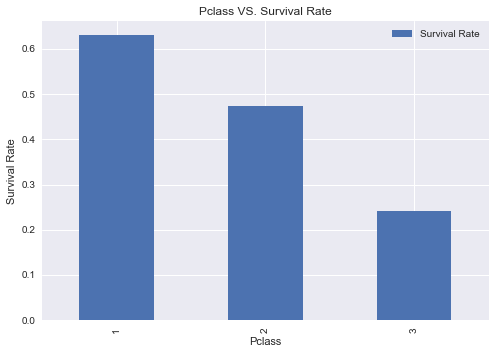

In [5]:
axe_pclass = survived_rate_pclass.plot(kind='bar')
axe_pclass.set_title('Pclass VS. Survival Rate')
axe_pclass.set_ylabel('Survival Rate')

一般来说，游轮舱房的设置，Pclass=1 的应该在上层， Pclass=2 的在中层， Pclass=3 在底层  
则按常理推测，生还率会是按顺序递减，即 生还率(Pclass=1) > 生还率(Pclass=2) > 生还率(Pclass=3)  
  
从数据结果来看，符合这种递减趋势。可以将舱房等级视为生还的因素之一。

### 性别

In [6]:
titanic_sex = titanic_key_factors[['Survived', 'Sex']]
# 按 Sex 分组
groupby_sex = titanic_sex.groupby('Sex')
# 各 Sex 的总数
total_groupby_sex = groupby_sex.count()
# 各 Sex 的生还数
survived_groupby_sex = groupby_sex.sum()

print total_groupby_sex.rename(columns={'Survived':'Total'})
print survived_groupby_sex

survive_rate_sex = (survived_groupby_sex / total_groupby_sex).rename(columns={'Survived':'Survival Rate'})
print survive_rate_sex

        Total
Sex          
female    314
male      577
        Survived
Sex             
female       233
male         109
        Survival Rate
Sex                  
female       0.742038
male         0.188908


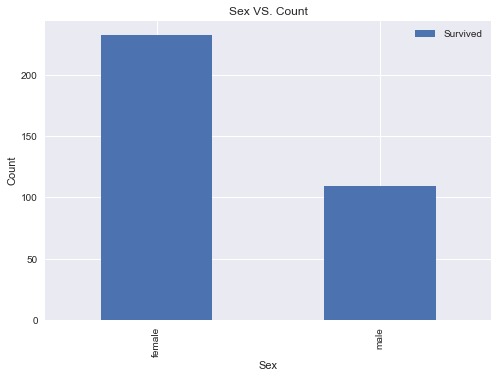

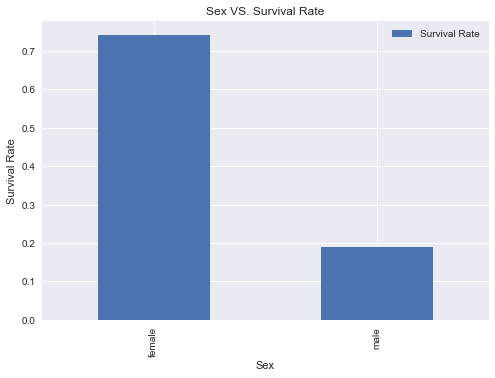

In [7]:
axe1_sex = survived_groupby_sex.plot(kind='bar')
axe1_sex.set_title('Sex VS. Count')
axe1_sex.set_ylabel('Count')

axe2_sex = survive_rate_sex.plot(kind='bar')
axe2_sex.set_title('Sex VS. Survival Rate')
axe2_sex.set_ylabel('Survival Rate')

女性生还率接近男性生还率的四倍。女性生还数是男性的两倍以上。  
  
按常理推测，男性的强壮性比女性高，生存几率应该较大。出现这种情况，有可能是男性协助女性逃生，或者说将生存机会让给女性。

### 年龄

In [8]:
titanic_age = titanic_key_factors[['Survived', 'Age']]

           Dead
age_group      
[0, 10)      24
[10, 20)     61
[20, 30)    143
[30, 40)     94
[40, 50)     55
[50, 60)     28
[60, 70)     13
[70, 80)      6
unknown     125
           Survived
age_group          
[0, 10)          38
[10, 20)         41
[20, 30)         77
[30, 40)         73
[40, 50)         34
[50, 60)         20
[60, 70)          6
[80, 90)          1
unknown          52


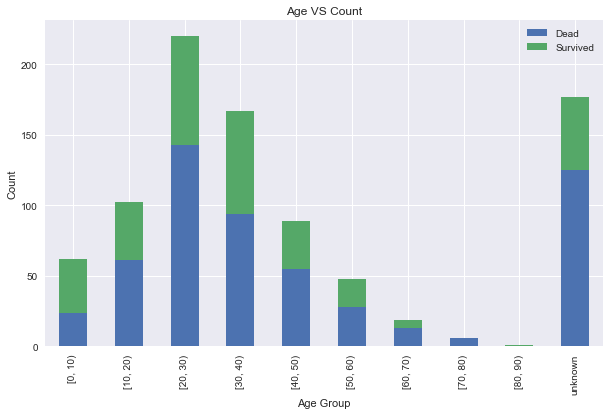

In [9]:
def group_age(age, lim):
    '''
    将年龄数据 age 分组，按照组距 lim 进行
    '''
    if age == 0:
        return 'unknown'
    group = int(age) / lim
    return ('[%d, %d)') % (group*10, group*10+10)

# 创建年龄分组
age_group = pd.DataFrame({
    'age_group':[group_age(age, 10) for age in titanic_age.Age]
})

groupby_age = pd.concat([titanic_age['Survived'], age_group], axis=1)
# 按年龄段分组的死亡数
dead_groupby_age = groupby_age[groupby_age.Survived==0].groupby('age_group').count()
# 按年龄段分组的生还数
survived_groupby_age = groupby_age[groupby_age.Survived==1].groupby('age_group').count()

print dead_groupby_age.rename(columns={'Survived':'Dead'})
print survived_groupby_age

titanic_age_group_count = pd.concat([dead_groupby_age.rename(columns={'Survived':'Dead'}),survived_groupby_age], axis=1)
axe1_age_group = titanic_age_group_count.plot(kind='bar', stacked=True, figsize=(10, 6))
axe1_age_group.set_title('Age VS Count')
axe1_age_group.set_xlabel('Age Group')
axe1_age_group.set_ylabel('Count')

就年龄已知的部分来看，只有儿童(小于10岁)的生还人数大于死亡人数。  
其余各年龄段，生还人数均小于死亡人数。特别是20-30年龄段，生还人数远小于死亡人数。  

生还数量并不能说明问题，以下对生还率与年龄的关系进行分析

           Survived
age_group          
[0, 10)    0.612903
[10, 20)   0.401961
[20, 30)   0.350000
[30, 40)   0.437126
[40, 50)   0.382022
[50, 60)   0.416667
[60, 70)   0.315789
[70, 80)   0.000000
[80, 90)   1.000000
unknown    0.293785


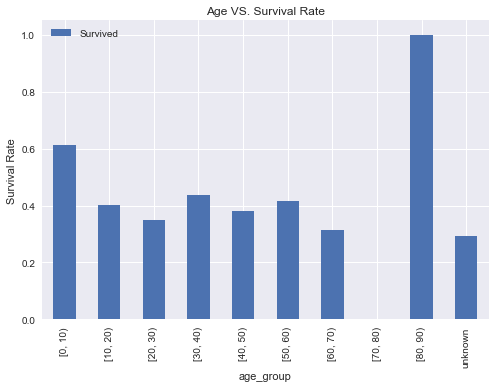

In [10]:
## 各年龄段的生存率
#survive_rate_groupby_age = (survived_groupby_age / (survived_groupby_age + dead_groupby_age)).rename(columns={'Survived':'Survival Rate'})
## 填充空缺值
#survive_rate_groupby_age = survive_rate_groupby_age.fillna(value=0)

# 直接计算 Survived 的均值，即为生存率
survive_rate_groupby_age = groupby_age.groupby('age_group').mean()

print survive_rate_groupby_age

axe2_age_group = survive_rate_groupby_age.plot(kind='bar')
axe2_age_group.set_title('Age VS. Survival Rate')
axe2_age_group.set_ylabel('Survival Rate')

就各年龄段的生存率来说，儿童（0-10）的生存几率最大（超过50%）。高龄组（80-90）仅有一人，且生还，故而其生还率达100%，属于特例。  
其它年龄段没有特别明显的差异，均小于50%。最低的是老龄人（60-70），生还率仅有31.58%。

Survived     177
age_group    177
dtype: int64


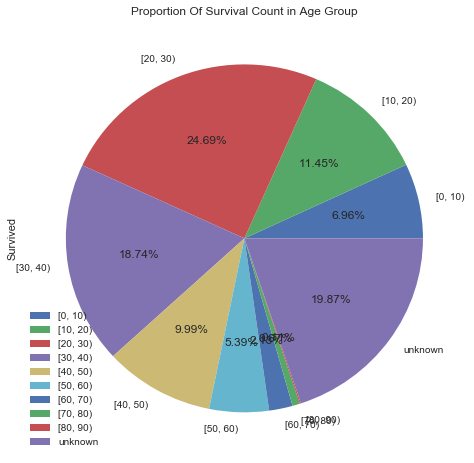

In [11]:
# 年龄未知的人数
num_unknown = groupby_age[groupby_age.age_group=='unknown'].count()

print num_unknown

# 各年龄段的人数占比
num_total = groupby_age.groupby('age_group').count()
axe3_age_group = num_total.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(8, 8))[0]
axe3_age_group.set_title('Proportion Of Survival Count in Age Group')

由于年龄未知的人数较多（177人，占总体19.87%），对上述生还率与年龄关系的判断可能存在较大影响。

## 双因素分析

### 舱房等级 & 性别


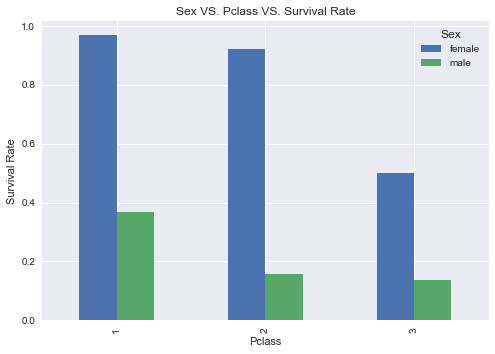

In [12]:
axe_pclass_sex = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
axe_pclass_sex.set_title('Sex VS. Pclass VS. Survival Rate')
axe_pclass_sex.set_ylabel('Survival Rate')

从上图可以得知，不管是男性还是女性，生还率随着舱房等级的提高而增大。

### 性别 & 年龄

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


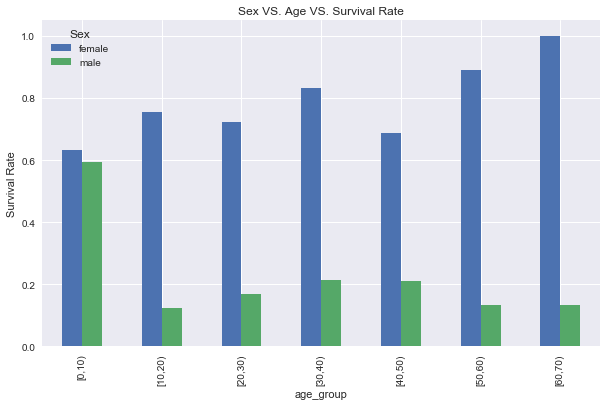

In [13]:
# Pandas 的 cut() 方法，用于分组聚集！！！
bins = np.arange(0, 80, 10)
#titanic_key_factors_new = pd.concat([titanic_key_factors, pd.cut(titanic_df['Age'], bins, right=False)], axis=1)
#titanic_key_factors_new
        
# 这个赋值会有一个 warning。 搜索过没能解决。。。
age_group_names = ['[0,10)', '[10,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)']
titanic_key_factors['age_group'] = pd.cut(titanic_df['Age'], bins, labels=age_group_names, right=False)
axe_age_sex = titanic_key_factors.groupby(['age_group', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_sex.set_title('Sex VS. Age VS. Survival Rate')
axe_age_sex.set_ylabel('Survival Rate')

从上图可得知：
1. 不论性别，儿童生还率都较高（超过50%）
2. 对于超过10岁的人来说，不论年龄，女性生还率远高于男性

### 舱房等级 & 年龄

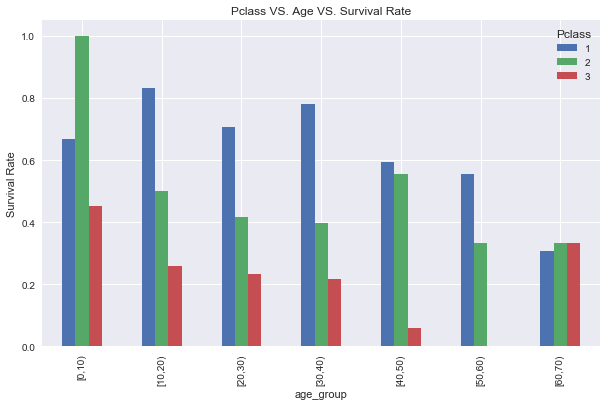

In [14]:
axe_age_pclass = titanic_key_factors.groupby(['age_group', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_pclass.set_title('Pclass VS. Age VS. Survival Rate')
axe_age_pclass.set_ylabel('Survival Rate')

由上图可得出：
1. 总体上来说，生还率随着舱房等级的提高而增大
2. 分析年龄两端数据
    - 无论舱房等级，老年人（60岁以上）的生还率很接近（但生还率均比较低）
    - 对于儿童（10岁以下），`Pclass=2`的比`Pclass=1`高，有点偏离规律，下面进一步分析

In [15]:
titanic_key_factors[(titanic_key_factors['age_group'] == '[0,10)') & (titanic_key_factors['Pclass'] == 1)]

,Survived,Pclass,Sex,Age,age_group
297,0,1,female,2.00,"[0,10)"
305,1,1,male,0.92,"[0,10)"
445,1,1,male,4.00,"[0,10)"


从上述表格得知，10岁以下儿童中，`Pclass=1`只有三位，而其中一位没有生还，从而导致生还率偏低（相对于`Pclass=2`来说）  
合理猜测是由于某些意外，这位年龄小的儿童未能生还。  
<br/>
上述的第一点结论，还是较符合实际的。

## 分析小结

从上述分析结果来看，可得出以下几个结论：
1. 舱房等级越高，则生还率越高，不论年龄、性别
2. 不论年龄、舱房等级，女性生还率最高
3. 儿童的还率较高，与性别、舱房等级无关

# 初步结论

通过对泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息的分析，对于问题“有哪些因素会让船上的人生还率更高？”得出以下初步结论：

1. 舱房等级、性别、年龄是影响生还率的因素
2. 住高等级舱房的女性，其生还率是最高的；其次则为儿童（与性别、舱房等级无关）

然而，由于不清楚样本是否随机选取、样本量不大，且样本数据中存在信息缺失，初步结论并无法表明这三个因素与“生还率”具有相关性。